Recommendation system

Importing modules

In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Read data and data preprocessing

In [4]:
df= pd.read_csv("Spotify.csv")
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

In [6]:
df= df.iloc[0:999]
df['song_id'] = range(1, len(df) + 1)
df.isna().sum()

C:\Users\PI\AppData\Local\Temp\ipykernel_7276\3121881759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['song_id'] = range(1, len(df) + 1)


title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
song_id          0
dtype: int64

bpm-tempo
nrgy-energy
dnce-dancability
db-loudness
live-liveliness
val-valance
dur-duration(len) of song
acous- acusticness
spch-speechniess
pop-popularity

In [7]:
genre_dict = {
    "dance pop" : "pop", 
    "pop soul" : "soul",
    "atl hip hop" : "hip hop",
    "pop rap" : "rap",
    "big room" : "house",
    "canadian hip hop" : "hip hop",
    "disco house" : "house",
    "romanian house" : "house",
    'lilith' : "indie",
    'detroit hip hop' : "hip hop", 
    'asian american hip hop' : "hip hop", 
    'east coast hip hop': "hip hop",
    'neo mellow' : "pop", 
    'canadian pop' : "pop", 
    'reggae fusion' : "reggae", 
    'idol' : "pop", 
    'art pop' : "pop",
    "talent show" : "pop", 
    'modern alternative rock' : "rock",
    'indietronica' : "electronic", 
    'grime' : "hip hop", 
    'barbadian pop' : "pop", 
    'acoustic pop' : "pop",
    'dutch house' : "house", 
    'belgian pop' : "pop", 
    'contemporary country' : "country", 
    'boy band' : "pop",
    'celtic rock' : "rock", 
    'edm' : "electronic", 
    'indie rock' : "indie", 
    'australian dance' : "dance",
    'british soul' : "soul", 
    'eau claire indie' : "indie", 
    'dancefloor dnb' : "dance",
    'permanent wave' : "rock", 
    'hip pop' : "pop", 
    'g funk' : "funk", 
    'baroque pop' : "pop", 
    'indie pop' : "pop",
    'chicago rap' : "rap", 
    'indie poptimism' : "indie", 
    'french shoegaze' : "rock",
    'alternative metal' : "metal", 
    'indie folk' : "indie", 
    'alternative rock' : "rock",
    'uk hip hop' : "hip hop", 
    'electro house' : "house", 
    'garage rock' : "rock", 
    'israeli pop' : "pop",
    'alternative r&b' : "r&b", 
    'australian pop' : "pop", 
    'candy pop' : "pop", 
    'modern rock' : "rock",
    'conscious hip hop' : "hip hop", 
    'folk-pop' : "pop", 
    'alternative dance' : "dance", 
    'k-pop' : "pop",
    'gangster rap' : "rap", 
    'brostep' : "dance", 
    'downtempo' : "pop", 
    'la indie' : "indie", 
    'bass trap' : "dance",
    'metropopolis' : "pop", 
    'electropop' : "pop", 
    'electro' : "electronica", 
    'destroy techno' : "dance", 
    'emo' : "rock",
    'austrian pop' : "pop", 
    'irish pop' : "pop", 
    'adult standards' : "pop", 
    'modern folk rock' : "rock",
    'tropical house' : "house", 
    'contemporary r&b' : "r&b", 
    'deep disco house' : "house",
    'bubblegum dance' : "dance", 
    'chill pop' : "pop", 
    'comic' : "pop", 
    'complextro' : "electronica", 
    'nyc rap' : "rap",
    'deep groove house' : "house", 
    'australian hip hop' : "hip hop", 
    'neo soul' : "soul",
    'deep house' : "house", 
    'french indie pop' : "pop", 
    'german pop' : "pop", 
    'dutch hip hop' : "hip hop",
    'aussietronica' : "electronica", 
    'australian indie' : "indie", 
    'canadian contemporary r&b' : "r&b",
    'kentucky hip hop' : "hip hop", 
    'new jersey rap' : "rap", 
    'irish singer-songwriter' : "pop",
    'ghanaian hip hop' : "hip hop", 
    'icelandic indie' : "indie", 
    'indie pop rap' : "pop",
    'new french touch' : "pop", 
    'san diego rap' : "rap", 
    'australian psych' : "rock",
    'canadian indie' : "indie", 
    'alt z' : "pop", 
    'danish pop' : "pop", 
    'melodic rap' : "rap",
    'social media pop' : "pop", 
    'london rap' : "rap", 
    'florida rap' : "rap", 
    'emo rap' : "rap",
    'latin' : "dance", 
    'ohio hip hop' : "hip hop", 
    'dfw rap' : "rap", 
    'hawaiian hip hop' : "hio hop",
    'dirty south rap' : "rap", 
    'afroswing' : "swing", 
    'basshall' : "dance", 
    'memphis hip hop' : "hip hop",
    'bedroom pop' : "pop", 
    'hollywood' : "pop", 
    'afrofuturism' : "pop", 
    'comedy rap' : "rap",
    'colombian pop' : "pop", 
    'cali rap' : "rap", 
    'black americana' : "pop",
    'north carolina hip hop' : "hip hop", 
    'alternative pop rock' : "pop", 
    'dark clubbing' : "dance",
    'lgbtq+ hip hop' : "hip hop", 
    'afro dancehall' : "dance", 
    'argentine hip hop' : "hip hop",
    'classic rock' : "rock", 
    'uk drill' : "hip hop"}

In [8]:
for key, value in genre_dict.items():
    df["top genre"].replace(key, value, inplace = True)

C:\Users\PI\AppData\Local\Temp\ipykernel_7276\1073779220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top genre"].replace(key, value, inplace = True)


In [9]:
df=df.drop_duplicates(subset="title")
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,song_id
0,STARSTRUKK (feat. Katy Perry),3OH!3,pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,1
1,My First Kiss (feat. Ke$ha),3OH!3,pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,2
2,I Need A Dollar,Aloe Blacc,soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,3
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,4
4,Nothin' on You (feat. Bruno Mars),B.o.B,hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,5


In [10]:
df.shape

(944, 18)

In [11]:
df.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,song_id
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,2014.370763,121.444915,69.682203,66.884534,-5.663136,17.974576,51.064619,220.609110,14.439619,10.156780,74.670551,2014.448093,494.866525
std,3.280495,26.190531,15.993128,13.104944,2.045837,13.601408,21.450751,40.274045,19.534958,9.409658,8.902592,2.895394,290.991695
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.000000,2.000000,35.000000,2010.000000,1.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.000000,4.000000,70.000000,2012.000000,241.750000
50%,2014.000000,122.000000,72.000000,68.000000,-5.000000,12.000000,51.000000,216.000000,6.000000,6.000000,76.000000,2014.000000,489.500000
75%,2017.000000,134.250000,82.000000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.000000,12.000000,81.000000,2017.000000,750.250000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.000000,53.000000,95.000000,2019.000000,999.000000


Data Visalization

In [12]:
import matplotlib.pyplot as plt

Top 5 artist

In [13]:
top_5_art= df[['artist', 'title']].groupby("artist").count().sort_values(by="title", ascending=False)[:5]
top_5_art

,title
artist,
Taylor Swift,18
Drake,18
Calvin Harris,18
Ariana Grande,13
Bruno Mars,12


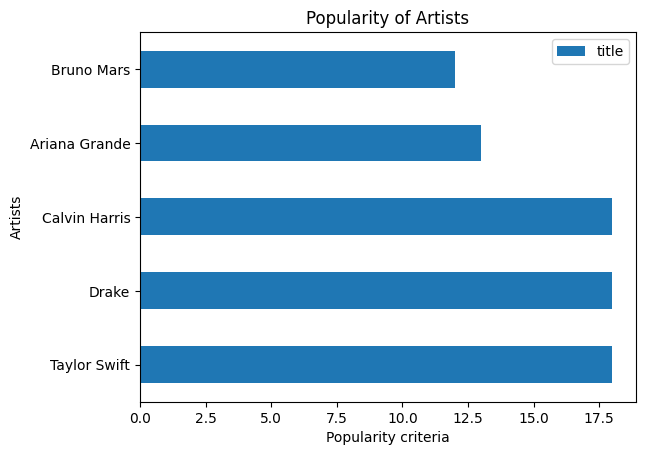

In [14]:
top_5_art.plot.barh()
plt.xlabel('Popularity criteria')
plt.ylabel('Artists')
plt.title('Popularity of Artists')
plt.show()

In [15]:
top_5_art= df[['artist', 'title']].groupby("artist").count().sort_values(by="title", ascending=False)[:5]
top_5_art

,title
artist,
Taylor Swift,18
Drake,18
Calvin Harris,18
Ariana Grande,13
Bruno Mars,12


In [16]:
a =df['top genre'].value_counts() 
a

top genre
pop            556
hip hop        126
rap             65
rock            43
dance           38
house           23
electronic      17
indie           15
r&b             15
country         13
soul            12
electronica      9
swing            4
funk             3
reggae           2
metal            2
hio hop          1
Name: count, dtype: int64

Word Cloud of Sportify data

In [17]:
a = df['top genre'].value_counts() 
a

top genre
pop            556
hip hop        126
rap             65
rock            43
dance           38
house           23
electronic      17
indie           15
r&b             15
country         13
soul            12
electronica      9
swing            4
funk             3
reggae           2
metal            2
hio hop          1
Name: count, dtype: int64

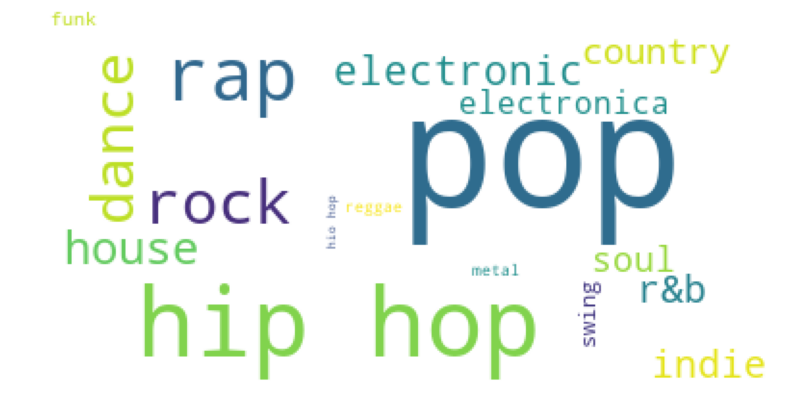

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = a

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
b = df['artist'].value_counts() 
b

artist
Taylor Swift        18
Calvin Harris       18
Drake               18
Ariana Grande       13
Rihanna             12
                    ..
Cold War Kids        1
Charli XCX           1
Bobby Shmurda        1
Becky G              1
Young T & Bugsey     1
Name: count, Length: 438, dtype: int64

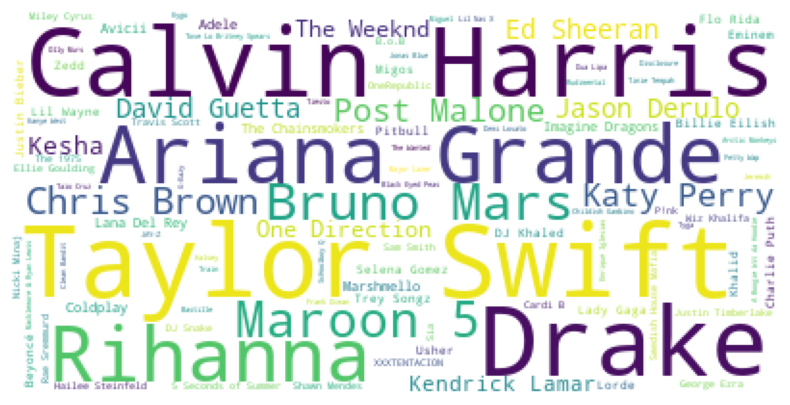

In [20]:
text = b

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

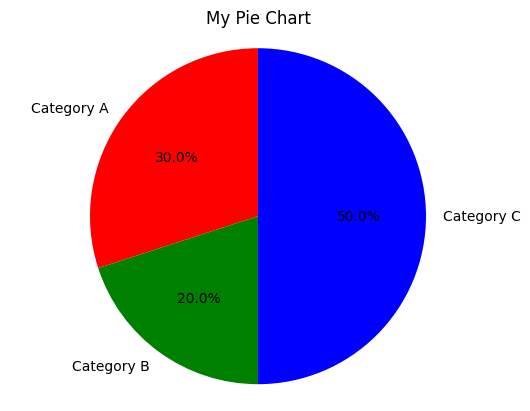

In [21]:
import matplotlib.pyplot as plt

data = [30, 20, 50]  # Replace with your data
labels = ['Category A', 'Category B', 'Category C']  # Replace with your category labels

plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('My Pie Chart')  # Replace with your chart title

plt.show()


In [22]:
df["artist"] = df["artist"].str.replace(" ", "")
df['title']= df['title'].str.replace(r'\([^)]*\)', '', regex=True)
df['title']=df['title'].str.lower()

In [23]:
df_rec=pd.DataFrame()
df_rec['song_id']= df['song_id']
df_rec['title']=df['title'].str.lower()
df_rec['artist']= df['artist']
df_rec.head()

,song_id,title,artist
0,1,starstrukk,3OH!3
1,2,my first kiss,3OH!3
2,3,i need a dollar,AloeBlacc
3,4,airplanes,B.o.B
4,5,nothin' on you,B.o.B


In [24]:
df_rec["data"] = df_rec.apply(lambda value: " ".join(value.astype("str")), axis=1)
df_rec.head()

,song_id,title,artist,data
0,1,starstrukk,3OH!3,1 starstrukk 3OH!3
1,2,my first kiss,3OH!3,2 my first kiss 3OH!3
2,3,i need a dollar,AloeBlacc,3 i need a dollar AloeBlacc
3,4,airplanes,B.o.B,4 airplanes B.o.B
4,5,nothin' on you,B.o.B,5 nothin' on you B.o.B


In [25]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df_rec["data"])
similarities = cosine_similarity(vectorized)
print(similarities)

[[1.         0.35355339 0.         ... 0.         0.         0.        ]
 [0.35355339 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [26]:
df_tmp = pd.DataFrame(similarities, columns=df_rec["title"], index=df_rec["title"]).reset_index()
df_tmp.head()

title,title,starstrukk,my first kiss,i need a dollar,airplanes,nothin' on you,magic,the time,imma be,talking to the moon,...,señorita,if i can't have you,don’t feel like crying,vossi bop,lover,cruel summer,you need to calm down,earfquake,boasty,strike a pose
0,starstrukk,1.000000,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,my first kiss,0.353553,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,i need a dollar,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.218218,0.0,0.0,0.0
3,airplanes,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,nothin' on you,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.235702,0.0,0.0,0.0,0.0,0.218218,0.0,0.0,0.0


In [27]:
true = True
while true:
    print("The Top 10 Song Recommendation System")
    print("-------------------------------------")
    print("This will generate the 10 songs from the database thoese are similar to the song you entered.")

    # Asking the user for a song, it will loop until the song name is in our database.
    while True:
        input_song = input("Please enter the name of song: ").strip()

        if input_song in df_tmp.columns:
            recommendation = df_tmp.nlargest(11, input_song)["title"]
            break
        
        else:
            print("Sorry, there is no song name in our database. Please try another one.")
    
    print("You should check out these songs: \n")
    for song in recommendation.values[1:]:
        print(song)

    print("\n")
    # Asking the user for the next command, it will loop until the right command.
    while True:
        next_command = input("Do you want to generate again for the next song? [yes, no] ")

        if next_command == "yes":
            break

        elif next_command == "no":
            # `true` will be false. It will stop the whole script
            true = False
            break

        else:
            print("Please type 'yes' or 'no'")

The Top 10 Song Recommendation System
-------------------------------------
This will generate the 10 songs from the database thoese are similar to the song you entered.
You should check out these songs: 

the man
i need a doctor
i need your love 
need u   - radio edit
you need to calm down
starstrukk 
my first kiss 
airplanes 
nothin' on you 
magic 




In [69]:
import requests
import base64
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [70]:
SPOTIPY_CLIENT_ID='e18fafeb60a949d2a9b7d1efccabe69a'
SPOTIPY_CLIENT_SECRET='739bbbed49864382a64a64ccd64ecdcc'

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [71]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [72]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
token

'BQBKh7NG2K4JsLGwCmHbK6RUQuky59H7vmDhzSGZqZrCeLejfRwYVSg118kC3qXYyNkq90m0hIGNl6nHPS7qKLMOwYGUVN8tdZbefD2-HCMNAz4M3_o'

In [80]:
def get_track_recommendations1(seed_tracks,token):
    limit = 20
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [90]:
import requests

def get_track_recommendations(seed_tracks, token):
    limit = 20
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    recommendations = res.json()

    custom_recommendations = []

    for track in recommendations['tracks']:
        track_id = track['id']
        
        track_info = get_track_info(track_id, token)
        custom_recommendations.append(track_info)

    return custom_recommendations


In [91]:
def get_track_info(track_id, token):
    track_url = f"https://api.spotify.com/v1/tracks/{track_id}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=track_url, headers=headers)
    track_info = res.json()

    attributes_to_include = ['name', 'danceability', 'energy', 'speechiness']

    return {attr: track_info.get(attr) for attr in attributes_to_include}


In [92]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'


In [93]:
json_response = get_track_recommendations(song_id,token)
json_response


[{'name': 'RIP Luv',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Circo Loco',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Wus Good / Curious',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Shoota (feat. Lil Uzi Vert)',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Flights',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Mystery Lady',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'hooligan',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Needle (feat. Drake)',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'I Know', 'danceability': None, 'energy': None, 'speechiness': None},
 {'name': 'Me or Sum (feat. Future & Lil Baby)',
  'danceability': None,
  'energy': None,
  'speechiness': None},
 {'name': 'Wanna Know Remix (feat. Drake)',
  'danceabil

In [68]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'
track_info = sp.track(song_id)
print("Keys in track_info:")
print(track_info.keys())

Keys in track_info:
dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])


In [56]:
import matplotlib.pyplot as plt

In [57]:
def get_top_trending_songs(num_songs=10):
    # Get the current user's top tracks (based on listening history)
    top_tracks = sp.current_user_top_tracks(limit=num_songs, offset=0, time_range='short_term')

    # Extract relevant information (track name, artist, popularity) from each track
    track_data = []
    for track in top_tracks['items']:
        track_data.append({
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'popularity': track['popularity']
        })

    return track_data

In [58]:
def plot_popularity_bar_chart(track_data):
    # Create a bar chart of track popularity
    names = [track['name'] for track in track_data]
    popularities = [track['popularity'] for track in track_data]

    plt.barh(names, popularities, color='skyblue')
    plt.xlabel('Popularity')
    plt.title('Top Trending Songs')
    plt.show()



In [60]:
# Print the access token
access_token = auth_manager.token_info['access_token']
print("Access Token:", access_token)

# Get top trending songs
try:
    top_trending_songs = sp.current_user_top_tracks(limit=10, offset=0, time_range='short_term')
except spotipy.SpotifyException as e:
    print(f"SpotifyException: {e}")
    
#top_trending_songs = get_top_trending_songs()

# Print information about the top trending songs
print("Top Trending Songs:")
for i, track in enumerate(top_trending_songs, start=1):
    print(f"{i}. {track['name']} by {track['artist']} - Popularity: {track['popularity']}")

# Plot popularity bar chart
plot_popularity_bar_chart(top_trending_songs)


AttributeError: 'SpotifyClientCredentials' object has no attribute 'token_info'

In [61]:
# Print the access token
access_token = auth_manager.token_info['access_token']
print("Access Token:", access_token)

# Get top trending songs
try:
    top_trending_songs = sp.current_user_top_tracks(limit=10, offset=0, time_range='short_term')
except spotipy.SpotifyException as e:
    print(f"SpotifyException: {e}")

# Get top trending songs
#top_trending_songs = get_top_trending_songs()

# Print information about the top trending songs
print("Top Trending Songs:")
for i, track in enumerate(top_trending_songs, start=1):
    print(f"{i}. {track['name']} by {track['artist']} - Popularity: {track['popularity']}")

# Plot popularity bar chart
plot_popularity_bar_chart(top_trending_songs)


AttributeError: 'SpotifyClientCredentials' object has no attribute 'token_info'

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

def feature_plot(features):
    labels = list(features)[:]
    stats = features.mean().tolist()

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

    # close the plot
    stats = np.concatenate((stats, [stats[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Size of the figure
    fig = plt.figure(figsize=(5, 5))  # Adjusted figure size

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label="Features", color='gray')
    ax.fill(angles, stats, alpha=0.25, facecolor='gray')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels, fontsize=10)  # Adjusted label font size

    ax.set_rlabel_position(90)  # Adjusted label position
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", '0.4', "0.6", "0.8"], color="grey", size=8)  # Adjusted y-tick font size
    plt.ylim(0, 1)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

    st.pyplot(plt)

# Example usage:
# features = pd.DataFrame(...)  # Replace with your feature data
# feature_plot(features)


In [ ]:
if selected_track is not None and len(tracks) > 0:
    tracks_list = tracks['tracks']['items']
    track_id = None
    if len(tracks_list) > 0:
        for track in tracks_list:
            str_temp = track['name'] + " - By - " + track['artists'][0]['name']
            if str_temp == selected_track:
                track_id = track['id']
                track_album = track['album']['name']
                img_album = track['album']['images'][1]['url']
                #songrec.save_album_image(img_album, track_id)
    selected_track_choice = None            
    if track_id is not None:
        #image = songrec.get_album_mage(track_id)
        #st.image(image)
        #track_choices = ['Song Features', 'Similar Songs Recommendation']
        #selected_track_choice = st.sidebar.selectbox('Please select track choice: ', track_choices)        
        #if selected_track_choice == 'Song Features':
            st.write("Track Featers")
            track_features  = sp.audio_features(track_id) 
            df = pd.DataFrame(track_features, index=[0])
            df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
            st.dataframe(df_features)
            polarplot.feature_plot(df_features)

In [1]:
import requests
import base64
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
SPOTIPY_CLIENT_ID='e18fafeb60a949d2a9b7d1efccabe69a'
SPOTIPY_CLIENT_SECRET='739bbbed49864382a64a64ccd64ecdcc'

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [3]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [4]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
token

'BQB9uGtzBloir6OtGjBpozpGjb14RUakUgmq3PO6W1N16JP1t66MIEyqHfYBiwwy3C7r8-tmDEqgDAXuLkjRtLgtVLU_DN2kzQ--YbF_GyIuRv8Amgk'

In [6]:
def feature_requested():
    track_features  = sp.audio_features(track['id']) 
    df = pd.DataFrame(track_features, index=[0])
    df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    print(pd.DataFrame(df_features))
        #polarplot.feature_plot(df_features)
    #feature_button_state = st.button('Track Audio Features', key=track['id'], on_click=feature_requested)


In [7]:
def similar_songs_requested():
    similar_songs_json = songrec.get_track_recommendations(track['id'], token)
    recommendation_list = similar_songs_json['tracks']
    recommendation_list_df = pd.DataFrame(recommendation_list)
    recommendation_df = recommendation_list_df[['name', 'explicit', 'duration_ms', 'popularity']]
    with col21:
        st.dataframe(recommendation_df)
    with col31:
        songrec.song_recommendation_vis(recommendation_df)
    similar_songs_state = st.button('Similar Songs', key=track['id'], on_click=similar_songs_requested)